<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>üì¶ Sesi√≥n pr√°ctica 3: An√°lisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [1]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electr√≥nico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electr√≥nico: {correo}")

Ingresa tu nombre completo: Guillermo Mejia Uribe
Ingresa tu correo electr√≥nico: guillermo.mejia@udea.edu.co

Resumen de datos ingresados:
Nombre: Guillermo Mejia Uribe
Correo electr√≥nico: guillermo.mejia@udea.edu.co


## <span style="color:black;"><strong>Parte 3: An√°lisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: An√°lisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre ping√ºinos ant√°rticos, realiza un an√°lisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librer√≠a seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfol√≥gicas para el an√°lisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el n√∫mero de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qu√© especies se agrupan o separan mejor en el espacio reducido.

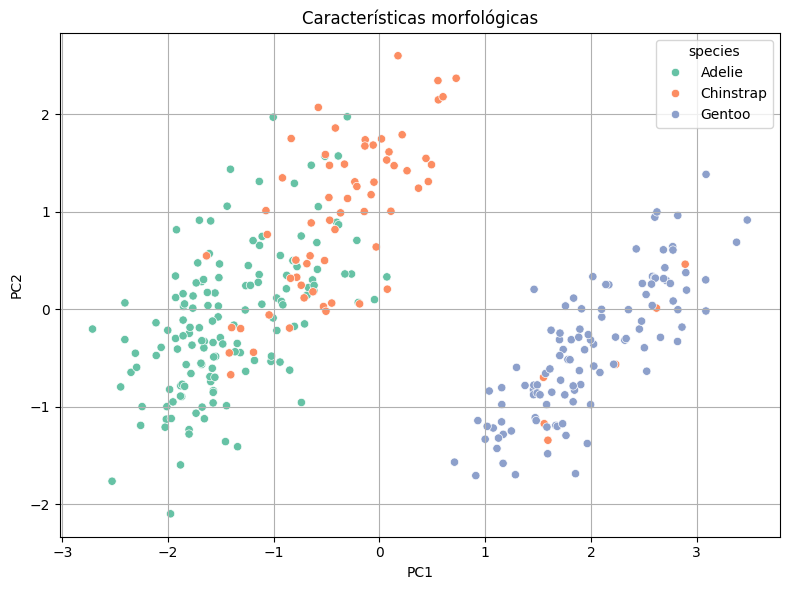


PC1 = 0.46√óbill_length_mm + -0.40√óbill_depth_mm + 0.58√óflipper_length_mm + 0.55√óbody_mass_g
PC2 = 0.60√óbill_length_mm + 0.80√óbill_depth_mm + 0.00√óflipper_length_mm + 0.08√óbody_mass_g


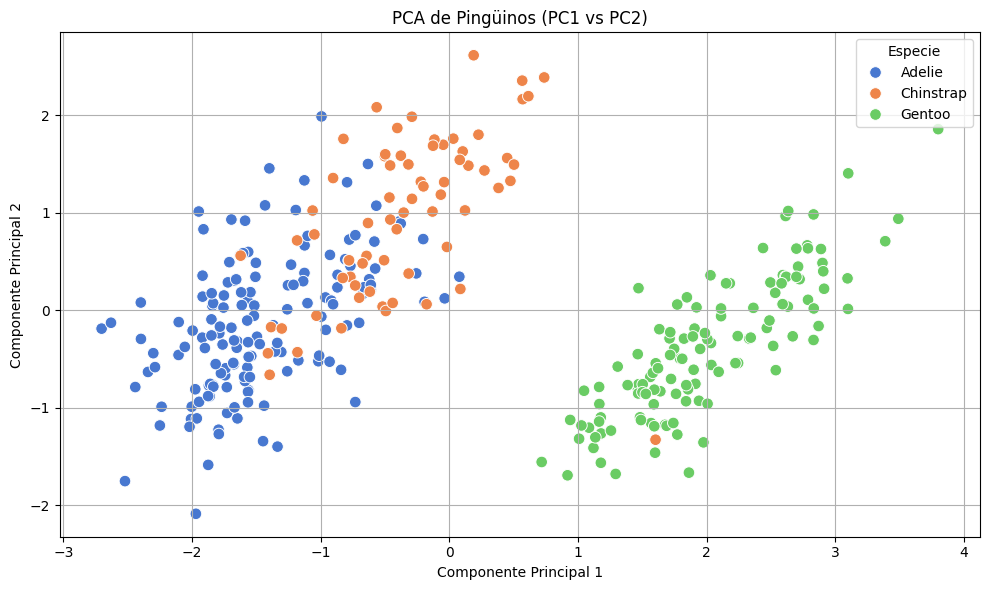

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar datos
penguins = sns.load_dataset("penguins")

# Variables morfol√≥gicas
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_selected = penguins[features + ['species']].dropna()

X = penguins_selected[features]
y = penguins_selected['species']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame con PC1 y PC2
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# Componentes
components = pca.components_

# Ecuaciones de los componentes principales
for i, component in enumerate(components):
    eq = " + ".join(f"{coef:.2f}√ó{feat}" for coef, feat in zip(component, features))
    print(f"PC{i+1} = {eq}")

# Grafico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='muted', s=70)
plt.title('PCA de Ping√ºinos (PC1 vs PC2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend(title='Especie')
plt.tight_layout()
plt.show()

# **An√°lisis del PCA aplicado al dataset de ping√ºinos**

**Objetivo del PCA:** Resumir la informaci√≥n de varias medidas f√≠sicas de los ping√ºinos en solo dos ejes para poder ver mejor c√≥mo se agrupan las especies. En lugar de analizar cuatro variables separadas, se usa el PCA para concentrar la informaci√≥n m√°s importante en dos componentes principales y as√≠ dibujar un gr√°fico que muestre las diferencias y similitudes entre especies.

**Interpretaci√≥n de los Componentes Principales**

* Componente Principal 1 (PC1): combina sobre todo tama√±o de aletas y peso del cuerpo, algo as√≠ como un indicador de ‚Äútama√±o general‚Äù del ping√ºino.

* Componente Principal 2 (PC2): refleja m√°s la forma del pico, es decir, la relaci√≥n entre su longitud y su profundidad.

En conjunto, estos dos ejes nos permiten ver la mayor parte de la variaci√≥n en los ping√ºinos con solo un gr√°fico 2D.

**An√°lisis de la gr√°fica (PC1 vs PC2): **

* Gentoo (verde): aparecen juntos y a la derecha, mostrando que son los ping√ºinos m√°s grandes y con aletas m√°s largas. Se distinguen claramente de las otras especies.

* Adelie (azul): quedan hacia la izquierda, con valores m√°s bajos en PC1 y repartidos en PC2. Son m√°s peque√±os y con picos distintos.

* Chinstrap (naranja): se ubican entre los otros dos grupos; se parecen a Adelie pero se diferencian un poco m√°s en la forma del pico.

**Conclusiones:**

* Gentoo se distingue claramente porque es la especie con caracter√≠sticas m√°s grandes.

* Adelie y Chinstrap son m√°s parecidos entre s√≠, aunque el segundo eje (forma del pico) ayuda a separarlos un poco.

* El PCA cumpli√≥ su objetivo: convertir varias medidas en dos ejes que nos dejan ver de un vistazo c√≥mo se parecen o se diferencian las especies.

* Este tipo de an√°lisis es muy √∫til para explorar datos reales y encontrar patrones sin complicarse con muchas variables.

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresi√≥n Lineal M√∫ltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un an√°lisis de regresi√≥n lineal m√∫ltiple para predecir el precio en funci√≥n de variables num√©ricas relacionadas con sus caracter√≠sticas f√≠sicas.  

1. Carga el conjunto de datos `diamonds` desde la librer√≠a seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el an√°lisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresi√≥n Lineal M√∫ltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R¬≤ ajustado, etc.).  
7. Eval√∫a el desempe√±o del modelo con m√©tricas de ajuste como **RMSE** y **R¬≤** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

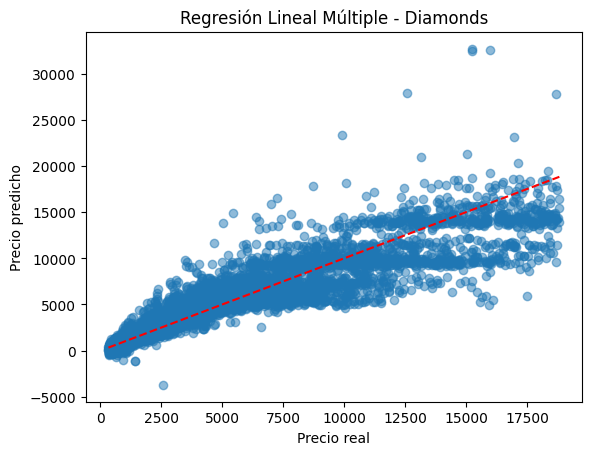



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 4.317e+04
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        05:28:08   Log-Likelihood:            -3.7681e+05
No. Observations:               43136   AIC:                         7.536e+05
Df Residuals:                   43129   BIC:                         7.537e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+04    798.920     23.218      0.0

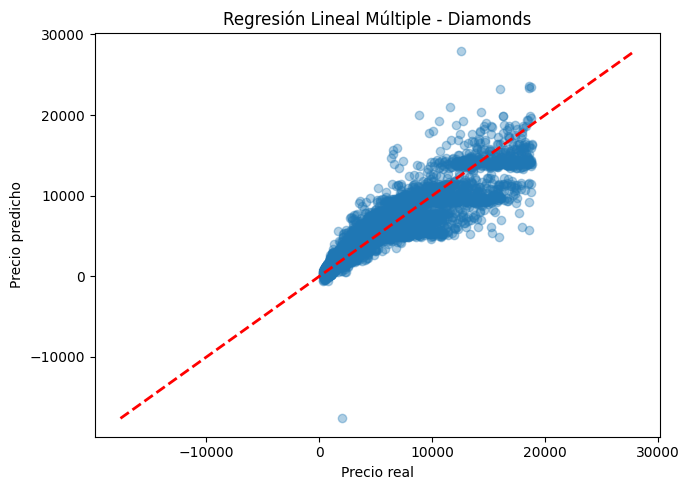

In [9]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Cargar datos
diamonds = sns.load_dataset("diamonds")

# Selecci√≥n de variables (y limpieza b√°sica)
vars_pred = ["carat", "depth", "table", "x", "y", "z"]
df = diamonds[vars_pred + ["price"]].dropna()
df = df[(df["x"] > 0) & (df["y"] > 0) & (df["z"] > 0)]  # quitar outliers obvios

X = df[vars_pred]
y = df["price"]

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Intercepto y ajustar OLS
X_train_const = sm.add_constant(X_train, has_constant="add")
X_test_const  = sm.add_constant(X_test,  has_constant="add")

modelo = sm.OLS(y_train, X_train_const).fit()

# Resumen del modelo
print(modelo.summary())

# Predicci√≥n y m√©tricas en test
y_pred = modelo.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"\nRMSE en test: {rmse:.2f}")
print(f"R¬≤ en test  : {r2:.4f}")

# Graficar
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.35)
lim_inf = min(y_test.min(), y_pred.min())
lim_sup = max(y_test.max(), y_pred.max())
plt.plot([lim_inf, lim_sup], [lim_inf, lim_sup], "r--", linewidth=2)
plt.title("Regresi√≥n Lineal M√∫ltiple - Diamonds")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.tight_layout()
plt.show()

# **Diagnosticos adicionales, Analisis y Conclusiones**

Se decide hacer diagn√≥sticos adicionales (VIF, residuos vs ajustados, Breusch‚ÄìPagan, QQ-plot) para:

* Comprobar supuestos del modelo lineal y no solo ajustar y predecir.

* Detectar problemas comunes como multicolinealidad, heterocedasticidad y no normalidad de residuos.

* Fortalecer la interpretaci√≥n: entender si el modelo es confiable para inferencia estad√≠stica, no solo para predicci√≥n.

In [16]:
# VIF: Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X_train.copy()  # sin la constante
vif_tbl = pd.DataFrame({
    "variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
}).sort_values("VIF", ascending=False)

print("\n--- VIF (Multicolinealidad) ---")
print(vif_tbl.to_string(index=False))

# Reglas:
# VIF > 10  -> multicolinealidad alta (preocupante)
# VIF 5‚Äì10 -> moderada (vigilar)
# VIF < 5  -> aceptable



--- VIF (Multicolinealidad) ---
variable         VIF
       z 3073.530790
       x 2606.004623
   depth  895.534813
   table  677.909137
       y  576.361508
   carat   89.747960


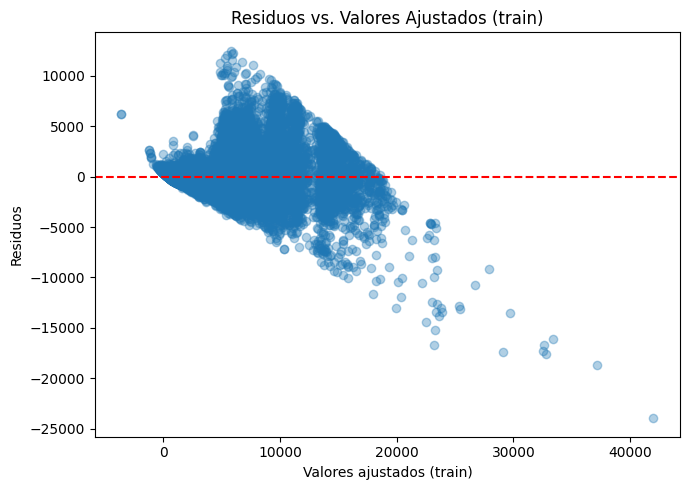

In [12]:
# Residuos vs Ajustados - Homocedasticidad
ajustados = modelo.predict(X_train_const)
residuos  = y_train - ajustados

plt.figure(figsize=(7,5))
plt.scatter(ajustados, residuos, alpha=0.35)
plt.axhline(0, color="red", linestyle="--", linewidth=1.5)
plt.title("Residuos vs. Valores Ajustados (train)")
plt.xlabel("Valores ajustados (train)")
plt.ylabel("Residuos")
plt.tight_layout()
plt.show()

In [14]:
# Breusch‚ÄìPagan
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_pvalue, f_stat, f_pvalue = het_breuschpagan(residuos, X_train_const)
print("\n--- Breusch‚ÄìPagan (H0: homocedasticidad) ---")
print(f"LM stat  : {bp_stat:.4f}")
print(f"LM p-val : {bp_pvalue:.4f}")
print(f"F stat   : {f_stat:.4f}")
print(f"F p-val  : {f_pvalue:.4f}")


--- Breusch‚ÄìPagan (H0: homocedasticidad) ---
LM stat  : 8004.9283
LM p-val : 0.0000
F stat   : 1637.8879
F p-val  : 0.0000


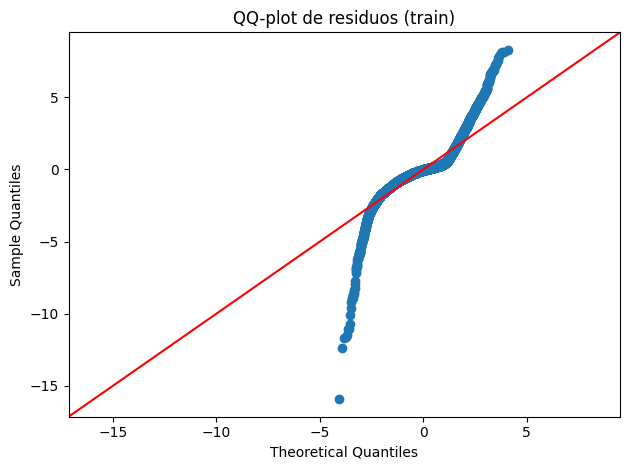

In [15]:
# QQ-plot de residuos
import statsmodels.api as sm

sm.qqplot(residuos, line="45", fit=True)
plt.title("QQ-plot de residuos (train)")
plt.tight_layout()
plt.show()

# **An√°lisis Regresi√≥n Lineal M√∫ltiple con Diamonds**

**Objetivo del PCA: ** El objetivo fue predecir el precio de los diamantes usando medidas f√≠sicas como peso en quilates (carat), profundidad, tabla y dimensiones (x, y, z). Se busca ver qu√© caracter√≠sticas afectan m√°s el precio y qu√© tan bien el modelo puede predecirlo.

**Resultados principales**

* El modelo logr√≥ explicar cerca del 86% de la variaci√≥n del precio, lo que es un resultado muy bueno para datos reales.

* El error promedio de predicci√≥n es de unos 1460 d√≥lares, as√≠ que en general las predicciones son bastante cercanas al precio real.

* Carat (el peso en quilates) es claramente la variable que m√°s empuja el precio hacia arriba.

**Revision del modelo: **

1. Variables muy relacionadas entre s√≠ (multicolinealidad):

  * Usando la ‚Äúregla r√°pida‚Äù (VIF >10 significa problema) vimos que todas las variables tienen valores muy altos.

  * Esto significa que muchas caracter√≠sticas se parecen demasiado entre s√≠ (por ejemplo peso y tama√±o).

  * Para predecir no pasa nada grave, pero para interpretar cada coeficiente por separado hay que tener cuidado porque pueden salir inestables.

2. Errores con distinta dispersi√≥n (heterocedasticidad):

  * En el gr√°fico de residuos vimos un patr√≥n tipo ‚Äúabanico‚Äù: para precios altos los errores son m√°s grandes y se van abriendo.

  * Seg√∫n la prueba Breusch‚ÄìPagan, el p-value menor a 0.05, que con la regla r√°pida significa que los errores no tienen la misma variaci√≥n en todo el rango de precios.

  * El modelo es menos preciso para diamantes muy caros.

3. Residuos no del todo normales:

  * En el QQ-plot los puntos se salen de la l√≠nea en los extremos.

  * Esto quiere decir que hay valores extremos y que los errores no son perfectamente ‚Äúen forma de campana‚Äù.

  * Para predicci√≥n no pasa nada grave, pero para conclusiones estad√≠sticas hay que tenerlo en cuenta.
**Interpretaciones de diagnosticos adicionales:**


**Conclusiones **

* El modelo predice bastante bien en promedio (R¬≤‚âà0.86), sobre todo para diamantes de precios bajos y medios.

* Carat es la variable m√°s importante para el precio.

* Muchas variables se parecen entre s√≠ (peso y dimensiones), lo que puede confundir la interpretaci√≥n de cada una.

* Los errores son mayores en diamantes caros, as√≠ que el modelo no es igual de confiable en todos los rangos.

* Para mejorar el modelo podr√≠amos:

    * Usar transformaciones (por ejemplo log del precio).

    * Usar errores robustos para que los resultados sean menos sensibles a variaciones.

    * Probar otros modelos (√°rboles de decisi√≥n, random forest) que manejen mejor datos con este tipo de problemas.


**En resumen**

Se construyo un modelo para predecir precios de diamantes con seis caracter√≠sticas f√≠sicas. El modelo predice muy bien (explica el 86% de la variaci√≥n) y el peso en quilates es la caracter√≠stica m√°s influyente. Sin embargo, muchas variables est√°n muy relacionadas entre s√≠ y el modelo es menos preciso para diamantes muy caros. Estas revisiones adicionales nos ayudaron a entender mejor las limitaciones y c√≥mo podr√≠amos mejorar el modelo.

| Diagn√≥stico                        | Regla r√°pida                                                                                                                   | Qu√© significa en este ejercicio                                                                                                                                      |
| ---------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Multicolinealidad (VIF)**        | - **VIF <5** ‚Üí aceptable<br>- **VIF 5‚Äì10** ‚Üí moderada<br>- **VIF >10** ‚Üí preocupante                                           | Los VIF son muy altos (‚â´10), lo que indica que las variables est√°n muy relacionadas entre s√≠. Para predecir no es grave, pero complica interpretar cada coeficiente. |
| **Residuos vs. Valores Ajustados** | - **Nube sin patr√≥n alrededor de 0** ‚Üí bien (varianza constante)<br>- **Forma de abanico/cone** ‚Üí problema (varianza desigual) | Se ve un ‚Äúabanico‚Äù en los precios altos: el modelo comete errores m√°s grandes cuando predice diamantes caros.                                                        |
| **Prueba Breusch‚ÄìPagan**           | - **p-value ‚â•0.05** ‚Üí no hay evidencia de problema<br>- **p-value <0.05** ‚Üí hay evidencia de heterocedasticidad                | p-value=0.0000: confirma lo que se ve en el gr√°fico, los errores no tienen la misma variaci√≥n en todo el rango.                                                      |
| **QQ-plot de residuos**            | - **Puntos alineados con la diagonal** ‚Üí normalidad<br>- **Puntos se apartan en las colas** ‚Üí no normalidad                    | Se observa desviaci√≥n en las colas, indicando residuos con valores extremos y no perfectamente normales.                                                             |
